<a href="https://colab.research.google.com/github/CeSaRLoPeZArTeAgA/Maestria-IMCA/blob/main/Regresion_Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAESTRIA DE MODELIZACION MATEMATICA Y COMPUTACIONAL
---
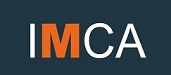


---


# CLASE: REGRESION LOGISTICA



---



**CASO 1: FUNCION LOGISTICA**

Regresión logística binaria simple. En esta ocasión queremos predecir cuál es la probabilidad de que un alumno apruebe un examen en **función** de las horas de estudio.

Como la variable objetivo es una variable cualitativa binaria (solo toma dos valores: aprobado=1, desaprobado=0) y solo tenemos una variable explicativa (las horas de estudio) podemos usar una regresión logística binaria simple para modelar la relación entre ambas variables.

In [ ]:
#importacion de librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#lectura de archivo VentasCaf.csv
df=pd.read_excel('reg_log.xlsx')
#se muestra los primeros 5 elementos de la data
df.head()

,Unnamed: 0,Horas,Aprobado
0,0,0.50,0
1,1,0.75,0
2,2,1.00,0
3,3,1.25,0
4,4,1.50,0


In [ ]:
#vemos la informacion basica de la data, cuanto datos no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  20 non-null     int64  
 1   Horas       20 non-null     float64
 2   Aprobado    20 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 608.0 bytes


In [ ]:
#crea el dataframe de variable objetico y la variable dependientes
X=df[['Horas']]
y=df['Aprobado']

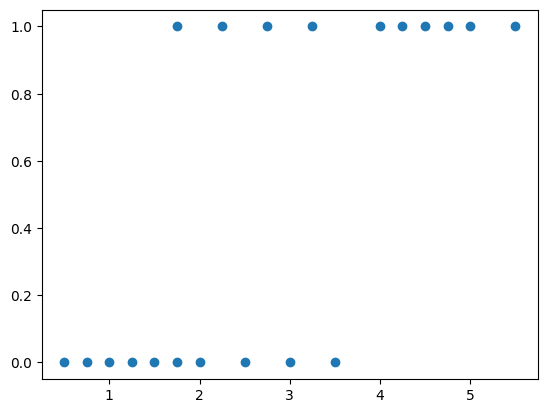

In [ ]:
#Diagrama de dispersion entre X=Horas y y=Aprobado
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.show()



---


**DIVISION DE LA DATA EN TRAIN Y TEST**

La función train_test_split nos permite dividir la data de forma aleatoria en conjuntos de entrenamiento(train) y prueba(test) para poder entrenar nuestro modelo

In [ ]:
#se carga la libreria para la division de la data del sklean
from sklearn.model_selection import train_test_split
#se devide la data en df_train y df_test, con un 20% de la data en df_test y una semilla de aleatoriedad 2023
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2023)



---



**MODELO FUNCION LOGISTICA(Sigmoide)**

La regresión logística utiliza una función logística o sigmoide para transformar la salida de la regresión lineal en un valor entre 0 y 1. La función sigmoide tiene la forma:


$$
f( z) =\frac{1}{1+e^{-z}}
$$


$$
z=b_{0} +b_{1} x
$$

In [ ]:
#cargamos la libreria para cargar el modelo de regresion logistica
from sklearn.linear_model import LogisticRegression

#definimos el objeto del modelo logistico a usar modelo
modelo=LogisticRegression()

#ajuste de la recta de regresión (entrenamiento del modelo X_train y y_train)
modelo.fit(X_train,y_train)

LogisticRegression()

In [ ]:
#coeficiente del modelo
print(modelo.intercept_)
print(modelo.coef_)

[-3.03792195]
[[1.06371456]]


In [ ]:
#prediciremos los valores que asume los valores de 2,4 y 7 horas. Arrojando los
#los valores de 0,1 y 1.
modelo.predict([[2], [4], [7]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 1, 1])

In [ ]:
#a continuacion se muestra la probabilidad que toma las variable 2,4 y 7. El resultado
#nos dara por filas [prob_desacierto prob_acierto]
modelo.predict_proba([[2], [4], [7]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.713101  , 0.286899  ],
       [0.22847606, 0.77152394],
       [0.01203201, 0.98796799]])



---


**CALCULO DE ERROR - ACCURACY SCORE(accuracy_score)**

La accuracy_score es una métrica comúnmente utilizada para evaluar el rendimiento de un modelo de clasificación. Esta métrica se utiliza para medir la precisión del modelo al predecir las clases correctas en relación con el total de predicciones realizadas. La fórmula para calcular la precisión es la siguiente:

$$
Accuracy=\frac{Numero\ de\ prediciones\ correctas}{Numero\ total\ de\ prediciones}
$$

In [ ]:
#obtenemos las predicciones del modelo para poder evaluarlas los errores
from sklearn.metrics import accuracy_score

#obtenemos las predicciones del modelo para poder evaluarlas los errores
predicciones_train=modelo.predict(X_train)
predicciones_test=modelo.predict(X_test)

print('Accuracy Score train:', accuracy_score(y_train, predicciones_train))
print('Accuracy Score test:', accuracy_score(y_test, predicciones_test) )

Accuracy Score train: 0.8125
Accuracy Score test: 0.5


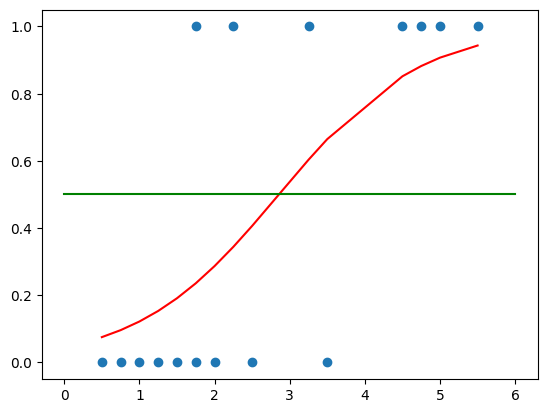

In [ ]:
#plotearemos la grafica de dispersion y probabilidad
plt.scatter(X_train, y_train)
#al estar desordenado la data de X_train, esta se debera ordenar para la grafica de probabilidades
df_sorted = X_train.sort_values(by='Horas')
probabilidades=modelo.predict_proba(df_sorted)
plt.plot(df_sorted, probabilidades[:,1], color='r')
plt.plot([0, 6], [.5, .5], color='g')
#plt.scatter(X, predicciones)



---



---



**CASO 2:REGRESION LOGISTICA**

 El departamento de crédito al consumo de un banco desea automatizar el proceso de toma de decisiones para la aprobación de líneas de crédito con garantía hipotecaria. Para hacer esto, seguirán las recomendaciones de la Ley de Igualdad de Oportunidades de Crédito para crear un modelo de calificación crediticia empíricamente derivado y estadísticamente sólido. El modelo se basará en datos recopilados de solicitantes recientes a los que se les otorgó crédito a través del proceso actual de suscripción de préstamos. Las posibles variables explicativas son:
* la cantidad del préstamo,
* el valor de la propiedad,
* el tipo de trabajo,
* la cantidad de años que lleva en el trabajo actual,
* el número de reportes negativos de crédito (major derogatory) entre otras.

**BAD =** Cliente moroso o pagador (1 o 0).

**LOAN =** cantidad del prestamo solicitado.

**MORTDUE =** monto adeudado de la hipoteca existente.

**VALUE =** valor de la propiedad actual.

**REASON=** razon del prestamo

**JOB=** tipo de trabajo

**YOJ =** años en el trabajo actual.

**DEROG =** cantidad de reportes de crédito negativos.

**DELINQ =** número de líneas de crédito morosas.

**CLAGE =** Antiguedad del tradeline más antiguo en meses

**NINQ=** ---

**CLNO =** Número de líneas de crédito.

**DEBTINC=** ---

In [1]:
#importacion de librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#lectura de archivo credit.csv
df=pd.read_csv('credit.csv')
#se muestra los primeros 5 elementos de la data
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [3]:
#tamaño de la data
df.shape

(5960, 13)

In [4]:
#informacion basica de la data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [5]:
#elimina una fila completa en el cual tenga NaN, en cualquier posicion de la fila
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3364 entries, 5 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      3364 non-null   int64  
 1   LOAN     3364 non-null   int64  
 2   MORTDUE  3364 non-null   float64
 3   VALUE    3364 non-null   float64
 4   REASON   3364 non-null   object 
 5   JOB      3364 non-null   object 
 6   YOJ      3364 non-null   float64
 7   DEROG    3364 non-null   float64
 8   DELINQ   3364 non-null   float64
 9   CLAGE    3364 non-null   float64
 10  NINQ     3364 non-null   float64
 11  CLNO     3364 non-null   float64
 12  DEBTINC  3364 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 367.9+ KB


OBSERVACION:

Para nuestra dataframe se eliminara la variable 'DEBTINC'. Para el modelo se usara la variable objetivo 'BAD'. Se usara todas las variables menos las variables JOB, REASON y DEBTINC

---


**DIVISION DE LA DATA EN TRAIN Y TEST**

La función train_test_split nos permite dividir la data de forma aleatoria en conjuntos de entrenamiento(train) y prueba(test) para poder entrenar nuestro modelo

In [6]:
df.drop(['DEBTINC'], axis=1, inplace=True)
X=df.drop(columns=['BAD', 'JOB', 'REASON'])
y=df['BAD']

In [7]:
#se carga la libreria para la division de la data del sklean
from sklearn.model_selection import train_test_split
#se devide la data en df_train y df_test, con un 20% de la data en df_test y una semilla de aleatoriedad 2023
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2023)



---


**MODELO REGRESION LOGISTICA**

 La ecuación de regresión logística es de la forma:


$$
p( Y=1) =\frac{1}{1+e^{-z}}
$$


$$
z=b_{0} +b_{1} X_{1}+...+b_{n} X_{n}
$$

Donde:

*$p(Y=1)$ es la probabilidad de que la variable dependiente $Y$ sea igual a 1.

*$b_{0},b_{1},...,b_{n}$ son los coeficientes del modelo

*$X_{1},X_{2},...,b_{n}$ son las variables independiente.

In [8]:
#cargamos la libreria para cargar el modelo de regresion logistica
from sklearn.linear_model import LogisticRegression

#definimos el objeto del modelo logistico a usar modelo
modelo=LogisticRegression()

#ajuste de la recta de regresión (entrenamiento del modelo X_train y y_train)
modelo.fit(X_train,y_train)

LogisticRegression()

In [9]:
#coeficiente del modelo
print(modelo.intercept_)
print(modelo.coef_)

[-3.29408438e-05]
[[-2.27409687e-05 -6.71444255e-07 -2.92163111e-06 -5.39377741e-04
   6.18851564e-05  8.44273756e-05 -8.82950337e-03  5.49913258e-05
  -3.66698914e-04]]


In [11]:
#prediciremos del valor de la varible objetivo cuando la variable dependiente
#asumen los valores de 1200,40000, 50000,4 ,0 , 1, 110, 0 y 10.
modelo.predict([[1200, 40000, 50000, 4, 0, 1, 110, 0, 10]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [12]:
#a continuacion se muestra la probabilidad que toma las variable 2,4 y 7. El resultado
#nos dara por filas [prob_desacierto prob_acierto]
modelo.predict_proba([[1200, 40000, 50000, 4, 0, 1, 110, 0, 10]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.76445242, 0.23554758]])

---


**CALCULO DE ERROR - ACCURACY SCORE(accuracy_score)**

La accuracy_score es una métrica comúnmente utilizada para evaluar el rendimiento de un modelo de clasificación. Esta métrica se utiliza para medir la precisión del modelo al predecir las clases correctas en relación con el total de predicciones realizadas. La fórmula para calcular la precisión es la siguiente:

$$
Accuracy=\frac{Numero\ de\ prediciones\ correctas}{Numero\ total\ de\ prediciones}
$$

In [13]:
#obtenemos las predicciones del modelo para poder evaluarlas los errores
from sklearn.metrics import accuracy_score

#obtenemos las predicciones del modelo para poder evaluarlas los errores
predicciones_train=modelo.predict(X_train)
predicciones_test=modelo.predict(X_test)

print('Accuracy Score train:', accuracy_score(y_train, predicciones_train))
print('Accuracy Score test:', accuracy_score(y_test, predicciones_test) )

Accuracy Score train: 0.9067261241174285
Accuracy Score test: 0.9271916790490342
